In [2]:
import random as rd
import numpy as np
import math
import matplotlib.pyplot as plt

class Animal:
  population_1 = []
  def __init__(self, loc_x, loc_y, type_of):
    self.x = loc_x
    self.y = loc_y
    self.species = type_of
    self.location_x = [self.x]
    self.location_y = [self.y]
    self.alive = 'alive'
    self.orientation = rd.randint(0,359)
    self.turn = [135.0,270.0]
    self.population_1.append(self)
  def movement(self):
        turn_chance = rd.randint(0, 20)
        if turn_chance == 0:
            self.orientation += 180
        if self.species == 'predator_1':
            angle = self.orientation + rd.randint(0, 40)
            length = np.random.beta(0.2, 0.7)
            new_location_x = float(self.location_x[-1] + np.cos(angle) * length)
            new_location_y = float(self.location_y[-1] + np.sin(angle) * length)
            if new_location_x > 9 or new_location_x < 0 or new_location_y > 4 or new_location_y < 0:
                self.orientation += np.random.choice(self.turn)
            else:
                self.location_x.append(new_location_x)
                self.location_y.append(new_location_y)
        if self.species == 'predator_2':
            angle = self.orientation + rd.randint(0, 40)
            length = np.random.beta(0.2, 0.7)
            new_location_x = float(self.location_x[-1] + np.cos(angle) * length)
            new_location_y = float(self.location_y[-1] + np.sin(angle) * length)
            if new_location_x > 9 or new_location_x < 0 or new_location_y > 9 or new_location_y < 5:
                self.orientation += np.random.choice(self.turn)
            else:
                self.location_x.append(new_location_x)
                self.location_y.append(new_location_y)
        if self.species == 'prey' and self.alive == 'alive':
            angle = self.orientation + rd.randint(0, 80)
            length = np.random.beta(0.5, 0.5)
            new_location_x = float(self.location_x[-1] + np.cos(angle) * length)
            new_location_y = float(self.location_y[-1] + np.sin(angle) * length)
            for i in range(len(Animal.population_1)):
              if int(self.location_x[-1] +- 1) == int(self.population_1[i].location_x[-1]) and int(self.location_y[-1]) +- 1 == int(self.population_1[i].location_x[-1]) and self.population_1[i].species == 'Predator_1' or 'Predator_2':
                chance_of_escape = .45
                dice_2 = rd.uniform(0,10)
                if chance_of_escape > dice_2:
                  self.orientation += 180
            if new_location_x > 9 or new_location_x < 0 or new_location_y > 9 or new_location_y < 0:
                self.orientation += np.random.choice(self.turn)
            else:
                self.location_x.append(new_location_x)
                self.location_y.append(new_location_y)
  def predation(self, lethality):
    if self.species == 'prey':
      pass
    else:
      for i in range(len(self.population_1)):
        if int(self.location_x[-1]) == int(self.population_1[i].location_x[-1]) and int(self.location_y[-1]) == int(self.population_1[i].location_y[-1]):
          dice = rd.uniform(0,1)
          if dice < lethality and self.population_1[i].species == 'prey':
            self.population_1[i].alive = 'munched'
          else:
            self.orientation += 180
            pass
  def gone(self):
      for j in range(len(self.population_1)-1,-1,-1):#count backwards
        if self.population_1[j].alive == 'munched':
          self.population_1.pop(j)
        else:
          pass
  def reproduce(self, x_location, y_location):
      return Animal(x_location, y_location, self.species)




def run_sim_1():
  Animal.population_1 = []
  #simulation setup
  shark = Animal(4, 3, 'predator_1')
  tuna = Animal(4,7,'predator_2')
  minnow = Animal(rd.randint(0,9),rd.randint(0,9), 'prey')

  for i in range(1):
    tuna.reproduce(7, 7)
    shark.reproduce(7,3) #adjusted for prey density
  for i in range(9):
    minnow.reproduce(rd.randint(0,9),rd.randint(0,9))



#simulation running
  global time
  global prey_pop_1
  prey_pop_1 = []
  time = []
  num_prey_2 = 0
  for time_step in range(100):
    for animal in range(len(Animal.population_1)):
      Animal.population_1[animal].movement()
      Animal.population_1[animal].predation(.8)
    Animal.population_1[animal].gone()
    time.append(time_step)
    for x in range(len(Animal.population_1)):
      if Animal.population_1[x].species == 'prey':
        num_prey_2 += 1
    prey_pop_1.append(num_prey_2)
    num_prey_2 = 0

  global prey_final_1
  prey_final_1 = prey_pop_1[-1]


def run_sim_2():
  Animal.population_1 = []
  #simulation setup
  shark = Animal(4, 3, 'predator_1')
  minnow = Animal(rd.randint(0,9),rd.randint(0,9), 'prey')

  for i in range(3):
    shark.reproduce(7,3) #adjusted for prey density
  for i in range(9):
    minnow.reproduce(rd.randint(0,9),rd.randint(0,9))



#simulation running
  global time
  global prey_pop_2
  prey_pop_2 = []
  time = []
  num_prey_2 = 0
  for time_step in range(100):
    for animal in range(len(Animal.population_1)):
      Animal.population_1[animal].movement()
      Animal.population_1[animal].predation(.8)
    Animal.population_1[animal].gone()
    time.append(time_step)
    for x in range(len(Animal.population_1)):
      if Animal.population_1[x].species == 'prey':
        num_prey_2 += 1
    prey_pop_2.append(num_prey_2)
    num_prey_2 = 0

  global prey_final_2
  prey_final_2 = prey_pop_2[-1]

def run_sim_3():
  Animal.population_1 = []
  #simulation setup
  tuna = Animal(4,7,'predator_2')
  minnow = Animal(rd.randint(0,9),rd.randint(0,9), 'prey')

  for i in range(3):
    tuna.reproduce(7, 7)
  for i in range(9):
    minnow.reproduce(rd.randint(0,9),rd.randint(0,9))



#simulation running
  global time
  global prey_pop_3
  prey_pop_3 = []
  time = []
  num_prey_3 = 0
  for time_step in range(100):
    for animal in range(len(Animal.population_1)):
      Animal.population_1[animal].movement()
      Animal.population_1[animal].predation(.8)
    Animal.population_1[animal].gone()
    time.append(time_step)
    for x in range(len(Animal.population_1)):
      if Animal.population_1[x].species == 'prey':
        num_prey_3 += 1
    prey_pop_3.append(num_prey_3)
    num_prey_3 = 0

  global prey_final_3
  prey_final_3 = prey_pop_3[-1]





run_sim_3()
run_sim_2()
run_sim_1()

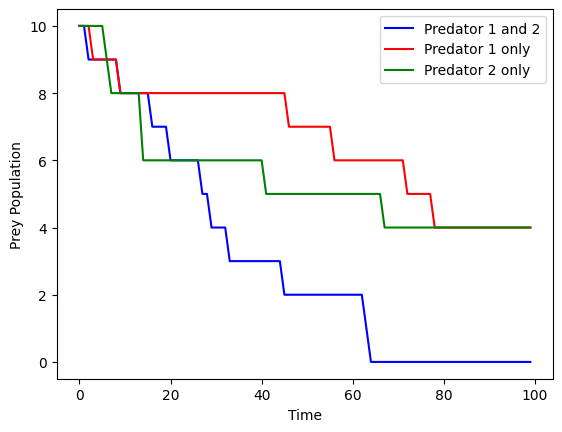

In [3]:
plt.plot(time, prey_pop_1, color = 'blue', label = 'Predator 1 and 2')
plt.plot(time, prey_pop_2, color = 'red', label = 'Predator 1 only')
plt.plot(time, prey_pop_3, color = 'green', label = 'Predator 2 only')
plt.xlabel('Time')
plt.ylabel('Prey Population')
plt.legend()
plt.show()


In [4]:
pop1 = []
pop2 = []
pop3 = []
pop_errs = []


for i in range(100):
  run_sim_1()
  pop1.append(prey_final_1)

  run_sim_2()
  pop2.append(prey_final_2)

  run_sim_3()
  pop3.append(prey_final_3)

pop_errs.append(np.std(pop1))
pop_errs.append(np.std(pop2))
pop_errs.append(np.std(pop3))

print('average number of prey in a simulation with both predators: ' + str(np.average(pop1)), 'standard deviation of set:' + str(np.std(pop1)))
print('average number of prey in a simulation with one predator (1): ' + str(np.average(pop2)), 'standard deviation of set:' + str(np.std(pop2)))
print('average number of prey in a simulation with one predator (2): ' + str(np.average(pop3)), 'standard deviation of set:' + str(np.std(pop3)))

average number of prey in a simulation with both predators: 2.7 standard deviation of set:1.3453624047073711
average number of prey in a simulation with one predator (1): 4.56 standard deviation of set:1.6511813952440235
average number of prey in a simulation with one predator (2): 4.92 standard deviation of set:1.6773789077009404


In [5]:
num_0_pop1 = 0
num_0_pop2 = 0
num_0_pop3 = 0
for i in range(len(pop1)):
  if pop1[i] == 0:
    num_0_pop1 += 1

for i in range(len(pop2)):
  if pop2[i] == 0:
    num_0_pop2 += 1

for i in range(len(pop3)):
  if pop3[i] == 0:
    num_0_pop3 += 1
print('number of extinction events: (both, 1,1 respectively): ', num_0_pop1, num_0_pop2, num_0_pop3)

number of extinction events: (both, 1,1 respectively):  1 1 0


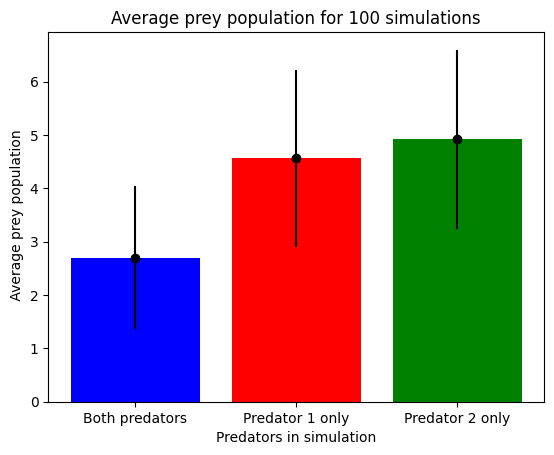

In [6]:
names = ['Both predators', 'Predator 1 only', 'Predator 2 only']
plt.bar(names[0], np.average(pop1), color = 'blue', label = 'Both Predators')
plt.errorbar(names[0], np.average(pop1), yerr= pop_errs[0], fmt = 'o', color = 'black')
plt.bar(names[1], np.average(pop2),color = 'red', label = 'Predator 1 Only')
plt.errorbar(names[1], np.average(pop2), yerr= pop_errs[1], fmt = 'o', color = 'black')
plt.bar(names[2], np.average(pop3),color = 'green', label = 'One Predator 2 Only')
plt.errorbar(names[2], np.average(pop3), yerr= pop_errs[2], fmt = 'o', color = 'black')
plt.ylabel(' Average prey population')
plt.xlabel('Predators in simulation')
plt.title('Average prey population for 100 simulations')
plt.show()

In [7]:
import scipy.stats as sp

sp.f_oneway(pop1, pop2, pop3)

F_onewayResult(statistic=57.36342857142856, pvalue=8.607300097891789e-22)